# Data Exploring & Cleaning

# 1. Import Library & datasets

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

%matplotlib inline
%xmode plain


Exception reporting mode: Plain


In [2]:
#Load dataset
train_df = pd.read_csv('./datasets/train.csv')

# 2. Check Dataset for any missing or abnormal data

In [3]:
#Checking the rows and columns of the dataset
print(train_df.shape)

(2051, 81)


From the code above it shows that the test set lacks of  1 category/ variance

In [4]:
#Expand view of collumns and rows
pd.set_option("display.max_rows", 81)
pd.set_option("display.max_columns", 81)

As seen from the code above the Test_df lacks the column 'SalePrice'.
We shall input a the 0 value into that test set. Having the values all set to 0 ....

## 2.1 Check for nan/null values 

Check Nan values for train dataset

In [5]:
#List of nan/null values based on column
train_df.isnull().sum().sort_values(ascending = False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
Year Built            0
SalePrice             0
Overall Qual          0
Land Contour          0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Area              0
Street                0
Lot Shape       

## 2.2 Checking unique data

In [6]:
#Checking the rows and columns of the dataset again, to confirm they have the same columns
print(train_df.shape)

(2051, 81)


In [7]:
train_df['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64

In [8]:
train_df['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [9]:
train_df['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [10]:
train_df['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [11]:
train_df['Functional'].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [12]:
train_df['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [13]:
train_df['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [14]:
train_df['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

## 2.3 Numerising Ordinal Data
Due to that there are multiple Nan values in seperated rows, we cannot use the:

train_df.dropna(how='any', inplace = True)

as this will remove too many observations/ rows

Thus, we need to remove certain least relevant categories. To do that we have to identify which columns by their categories, for nominal and ordinal

Categories:

    Ordinal:
    -Lot Shape, Utilities, Land Slope, Overall Qual, Overall Cond, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Pool QC, Fence
    
    Nominal:
    -PID, MS Zoning, Roof Style,Roof Matl, Exterior 1, Exterior 2, Mas Vnr Type, Street, Alley, Land Contour, Lot Config, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Foundation, Heating, Central Air, Garage Type, Misc Feature,Sale Type, Sale Condition

### Ordinal values

We shall input numerical values in 'ordinal' categories and compare in the corelation

Lot Shape

- 4        Reg	Regular	
- 3        IR1	Slightly irregular
- 2        IR2	Moderately Irregular
- 1        IR3	Irregular

Utilities

- 4        AllPub	All public Utilities (E,G,W,& S)	
- 3        NoSewr	Electricity, Gas, and Water (Septic Tank)
- 2        NoSeWa	Electricity and Gas Only
- 1        ELO	    Electricity only

Land Slope (Ordinal): Slope of property

- 3        Gtl	Gentle slope
- 2        Mod	Moderate Slope
- 1        Sev	Severe Slope
       
Overall Qual, Overall Cond

- 10       Very Excellent
- 9        Excellent
- 8        Very Good
- 7        Good	
- 6        Above Average
- 5        Average
- 4        Below Average	
- 3        Fair
- 2        Poor
- 1        Very Poor

Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, HeatingQC, KitchenQual, FireplaceQu, Garage Qual, Garage Cond, PoolQC
	
- 5        Ex Excellent
- 4        Gd Good	
- 3        TA Average/Typical
- 2        Fa Fair
- 1        Po Poor
- 0        NA Not available
   
Bsmt Exposure

- 4        Gd Good	
- 3        Av	Average Exposure (split levels or foyers typically score average or above)
- 2        Mn	Mimimum Exposure
- 1        No	No Exposure
- 0        NA	No Basement

BsmtFin Type 1, BsmtFinType 2

- 6        GLQ	Good Living Quarters
- 5        ALQ	Average Living Quarters
- 4        BLQ	Below Average Living Quarters
- 3        Rec	Average Rec Room
- 2        LwQ	Low Quality
- 1        Unf	Unfinshed
- 0        NA	No Basement

Electrical

- 5        SBrkr	Standard Circuit Breakers & Romex
- 4        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
- 3        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
- 2        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
- 1        Mix	Mixed

Functional
       
- 8        Typ	Typical Functionality
- 7        Min1	Minor Deductions 1
- 6        Min2	Minor Deductions 2
- 5        Mod	Moderate Deductions
- 4        Maj1	Major Deductions 1	
- 3        Maj2	Major Deductions 2
- 2        Sev	Severely Damaged
- 1        Sal	Salvage only

Garage Finish
		
- 3        Fin	Finished
- 2        RFn	Rough Finished
- 1        Unf	Unfinshed
- 0        NA	No Garage

Paved Drive

- 3        Y	Paved 
- 2        P	Partial Pavement
- 1        N	Dirt/Gravel

Fence

- 4        GdPrv	Good Privacy
- 3        MnPrv	Minimum Privacy
- 2        GdWo	Good Wood
- 1        MnWw	Minimum Wood/Wire
- 0        NA	No Fence


In [15]:
des_value = {'Reg': 4,'IR1': 3,'IR2': 2,'IR3': 1, 'AllPub': 4, 'NoSewr': 3, 
            'NoSeWa': 2,'ELO': 1, 'Gtl': 3, 'Mod': 2, 'Sev': 1, 'Ex': 5, 
            'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0, 'GLQ': 6, 'ALQ': 5,
            'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'SBrkr': 5, 'FuseA': 4,
            'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'Typ': 8, 'Min1': 7, 'Min2': 6,
            'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1, 'Fin': 3,
            'RFn': 2, 'Y': 3, 'P': 2, 'N': 1, 'GdPrv': 4, 'MnPrv': 3, 
             'GdWo': 2, 'MnWw': 1}
def des_to_num(dataframe, column):
    return dataframe[column].map(des_value)
    

In [16]:
train_df.shape

(2051, 81)

In [17]:
train_df['Lot Shape'] = des_to_num(train_df, 'Lot Shape')
train_df['Utilities'] = des_to_num(train_df, 'Utilities')
train_df['Land Slope'] = des_to_num(train_df, 'Land Slope')
train_df['Exter Qual'] = des_to_num(train_df, 'Exter Qual')
train_df['Exter Cond'] = des_to_num(train_df, 'Exter Cond')
train_df['Bsmt Qual'] = des_to_num(train_df, 'Bsmt Qual')
train_df['Bsmt Cond'] = des_to_num(train_df, 'Bsmt Cond')
train_df['Heating QC'] = des_to_num(train_df, 'Heating QC')
train_df['Kitchen Qual'] = des_to_num(train_df, 'Kitchen Qual')
train_df['Fireplace Qu'] = des_to_num(train_df, 'Fireplace Qu')
train_df['Garage Qual'] = des_to_num(train_df, 'Garage Qual')
train_df['Garage Cond'] = des_to_num(train_df, 'Garage Cond')
train_df['Pool QC'] = des_to_num(train_df, 'Pool QC')
train_df['Bsmt Exposure'] = des_to_num(train_df, 'Bsmt Exposure')
train_df['BsmtFin Type 1'] = des_to_num(train_df, 'BsmtFin Type 1')
train_df['BsmtFin Type 2'] = des_to_num(train_df, 'BsmtFin Type 2')
train_df['Electrical'] = des_to_num(train_df, 'Electrical')
train_df['Functional'] = des_to_num(train_df, 'Functional')
train_df['Garage Finish'] = des_to_num(train_df, 'Garage Finish')
train_df['Paved Drive'] = des_to_num(train_df, 'Paved Drive')
train_df['Fence'] = des_to_num(train_df, 'Fence')

In [18]:
train_df.shape

(2051, 81)

In [19]:
train_df.head(20)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,NaN,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,NaN,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,NaN,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,NaN,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,NaN,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,NaN,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,NaN,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,NaN,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,NaN,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,3,Lvl,4,Corner,3,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,4,3,CBlock,3.0,3.0,NaN,5.0,247.0,3.0,713.0,557.0,1517.0,GasA,5,Y,5,1888,0,0,1888,0.0,0.0,2,1,2,1,4,6,5,1,4.0,Attchd,1966.0,3.0,2.0,578.0,3.0,3.0,3,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,4,Lvl,4,Inside,3,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,3,3,PConc,4.0,3.0,4.0,6.0,547.0,1.0,0.0,0.0,547.0,GasA,4,Y,5,1072,0,0,1072,1.0,0.0,2,0,2,1,3,5,8,0,NaN,Basment,2005.0,3.0,2.0,525.0,3.0,3.0,3,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,3,3,CBlock,3.0,3.0,NaN,3.0,1000.0,1.0,0.0,188.0,1188.0,GasA,2,Y,5,1188,0,0,1188,1.0,0.0,1,0,3,1,3,6,8,0,NaN,Attchd,1959.0,2.0,2.0,531.0,3.0,3.0,3,0,0,0,0,0,0,NaN,3.0,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,4,Lvl,4,Inside,3,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,3.0,NaN,3.0,292.0,1.0,0.0,632.0,924.0,GasA,3,Y,5,924,0,0,924,0.0,0.0,1,0,2,1,3,6,8,0,NaN,Detchd,1952.0,1.0,1.0,420.0,3.0,3.0,3,0,324,0,0,0,0,NaN,3.0,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,3,HLS,4,Inside,2,NAmes,Norm,Norm,1F

## 2.4 Imputing data to Nan Values

In [20]:
a = (train_df['Garage Area'].mean())
b = (train_df['BsmtFin SF 2'].mean())
c = (train_df['BsmtFin SF 1'].mean())
d = (train_df['Bsmt Unf SF'].mean())

In [21]:
print(a,b,c,d)

473.6717073170732 47.959024390243904 442.30048780487806 567.7282926829268


In [22]:
#Pool QC: Nan as NA as 0 if Pool Area is 0
train_df['Pool QC'] = train_df['Pool QC'].replace({np.nan: 0})
#Bsmt Qual: Nan as NA as 0
train_df['Bsmt Qual'] = train_df['Bsmt Qual'].replace({np.nan: 0})
#Mas Vnr Type: Nan as NA as 0
train_df['Mas Vnr Type'] = train_df['Mas Vnr Type'].replace({np.nan: 0})
#Fireplace Qu: Nan as NA as 0
train_df['Fireplace Qu'] = train_df['Fireplace Qu'].replace({np.nan: 0})
#missing values are likely zero for no Garage
#Garage Finish: Nan as NA as 0
train_df['Garage Finish'] = train_df['Garage Finish'].replace({np.nan: 0})
#Garage Cond: Nan as NA as 0
train_df['Garage Cond'] = train_df['Garage Cond'].replace({np.nan: 0})
#Garage Qual: Nan as NA as 0
train_df['Garage Qual'] = train_df['Garage Qual'].replace({np.nan: 0})
#Garage Type: Nan as NA as 0
train_df['Garage Type'] = train_df['Garage Type'].replace({np.nan: 0})
#missing values are likely zero for no basement 
#Bsmt Cond: Nan as NA as 0
train_df['Bsmt Cond'] = train_df['Bsmt Cond'].replace({np.nan: 0})
#Bsmt Exposure: Nan as NA as 0
train_df['Bsmt Exposure'] = train_df['Bsmt Exposure'].replace({np.nan: 0})
#Misc Feature: Nan as NA as 0
train_df['Misc Feature'] = train_df['Misc Feature'].replace({np.nan: 0})
#BsmtFin Type 2: Nan as NA  as 0
train_df['BsmtFin Type 2'] = train_df['BsmtFin Type 2'].replace({np.nan: 0})
#BsmtFin Type 2: Nan as NA as 0
train_df['BsmtFin Type 1'] = train_df['BsmtFin Type 1'].replace({np.nan: 0})

train_df['Alley'] = train_df['Alley'].replace({np.nan: 0})

train_df['Fence'] = train_df['Fence'].replace({np.nan: 0})

train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(0)
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0)
train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(0)

In [23]:
train_df.shape

(2051, 81)

In [24]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,0.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0.0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,0.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0.0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,0.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0.0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,0.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0.0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,0.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0.0,0,0,3,2010,WD,138500


In [25]:
train_df['Pool QC'] = des_to_num(train_df, 'Pool QC')

In [26]:
train_df['Pool QC'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Pool QC, dtype: float64

In [27]:
train_df['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [28]:
train_df['MS Zoning'] = train_df['MS Zoning'].fillna('RL')

In [29]:
train_df['Utilities'].value_counts()

4    2049
3       1
2       1
Name: Utilities, dtype: int64

In [30]:
train_df['Utilities'].describe()

count    2051.000000
mean        3.998537
std         0.049365
min         2.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Utilities, dtype: float64

In [31]:
train_df['Utilities'] = train_df['Utilities'].fillna('4')

In [32]:
train_df['Bsmt Half Bath'].value_counts()

0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [33]:
train_df['Bsmt Full Bath'].value_counts()

0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [34]:
train_df['Bsmt Half Bath'] = train_df['Bsmt Half Bath'].fillna(0)

In [35]:
train_df['Bsmt Full Bath'] = train_df['Bsmt Full Bath'].fillna(0)

In [36]:
train_df['Functional'].value_counts()

8    1915
7      42
6      42
5      29
4      12
3       7
1       2
2       2
Name: Functional, dtype: int64

In [37]:
train_df['Functional'] = train_df['Functional'].fillna('8')

In [38]:
train_df['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

In [39]:
train_df['Garage Area'] = train_df['Garage Area'].fillna(train_df['Garage Area'].mean())

In [40]:
train_df['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [41]:
train_df['Garage Cars'] = train_df['Garage Cars'].fillna(2)

In [42]:
train_df['BsmtFin SF 2'] = train_df['BsmtFin SF 2'].fillna(train_df['BsmtFin SF 2'].mean())

In [43]:
train_df['BsmtFin SF 1'] = train_df['BsmtFin SF 1'].fillna(train_df['BsmtFin SF 1'].mean())

In [44]:
train_df['Electrical'].value_counts()

5    1868
4     140
3      35
2       7
1       1
Name: Electrical, dtype: int64

In [45]:
train_df['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [46]:
train_df['Exterior 2nd'] = train_df['Exterior 2nd'].fillna('VinylSd')

In [47]:
train_df['Kitchen Qual'].value_counts()

3    1047
4     806
5     151
2      47
Name: Kitchen Qual, dtype: int64

In [48]:
train_df['Kitchen Qual'] = train_df['Kitchen Qual'].fillna('3')

In [49]:
train_df['Exterior 1st'] = train_df['Exterior 1st'].fillna(train_df['Exterior 1st'].value_counts().index[0])

In [50]:
train_df['Bsmt Unf SF'] = train_df['Bsmt Unf SF'].fillna(train_df['Bsmt Unf SF'].mean())

In [51]:
train_df['Total Bsmt SF'] = train_df['Total Bsmt SF'].fillna(train_df['Total Bsmt SF'].mean())

In [52]:
train_df['Sale Type'] = train_df['Sale Type'].fillna(train_df['Sale Type'].value_counts().index[0])

In [53]:
train_df.shape

(2051, 81)

# 3. Exploratory Data Analysis

By creating a heat map we can visually see the highest correlation with Y-hat.

## 3.1 Heat Map

In [54]:
# PID and Id is dropped due to that each PID & Id is unique and no duplicate has happened
cor_train_df = train_df.drop(['PID','Id', 'Pool QC'], axis=1)

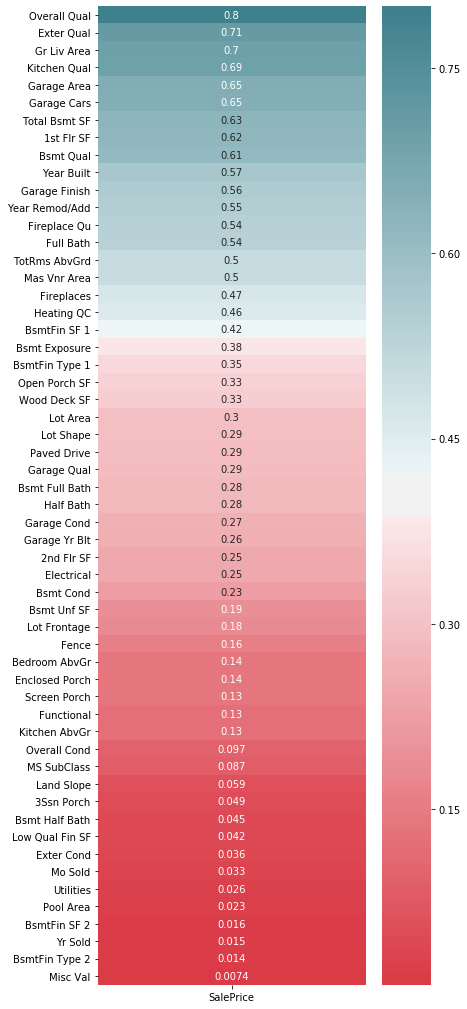

In [55]:
plt.figure(figsize=(6,18))
data_corr_2 = abs(cor_train_df.corr())[['SalePrice']].sort_values('SalePrice',ascending = False)
sns.heatmap(data_corr_2[1:], annot = True, cmap=sns.diverging_palette(730, 930, n=200) )

In [56]:
cor_train_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,0.0,13517,Pave,0,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,0.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,0,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,0.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,0,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,0.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,0,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,0.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,0,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,0.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0,0,3,2010,WD,138500


## 3.2 Individual Plots

### Sale Price

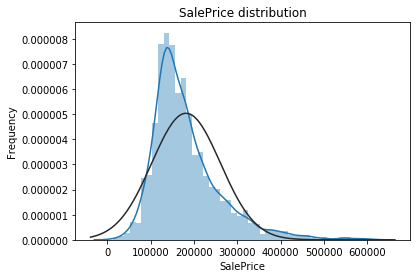

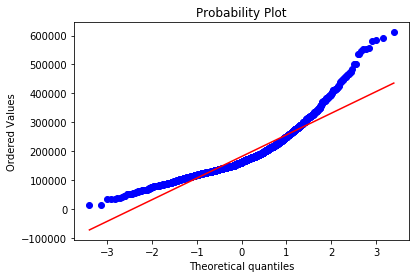

In [57]:
# Kernel Density Plot
sns.distplot(train_df.SalePrice,fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
# QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

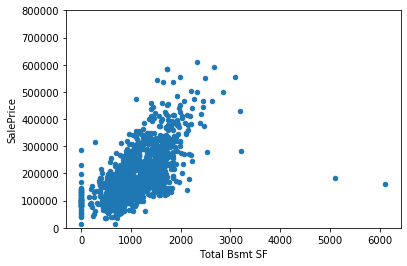

In [58]:
#scatter plot totalbsmtsf/saleprice
var = 'Total Bsmt SF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

### Overall Qual

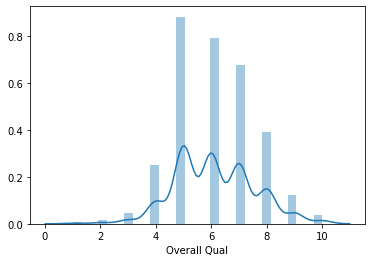

In [59]:
sns.distplot(train_df['Overall Qual'])

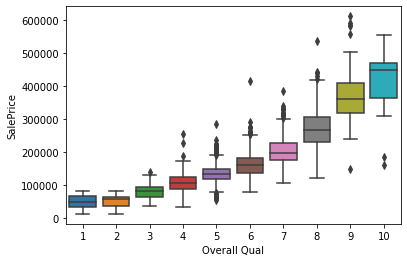

In [60]:
sns.boxplot(train_df['Overall Qual'], train_df['SalePrice'])

### External Qual

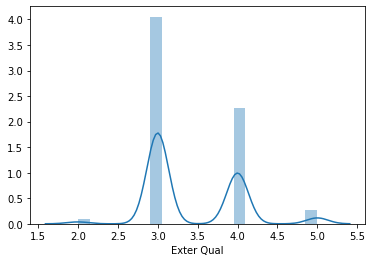

In [61]:
sns.distplot(train_df['Exter Qual'])

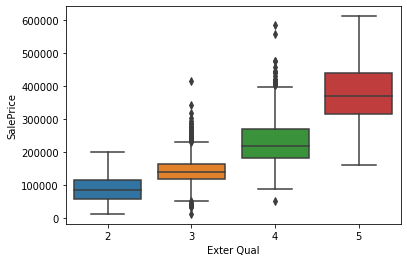

In [62]:
sns.boxplot(x=train_df['Exter Qual'], y=train_df['SalePrice'])

### Gr Liv Area

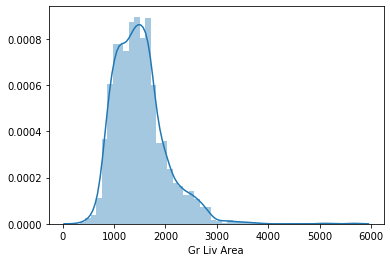

In [63]:
sns.distplot(train_df['Gr Liv Area'])

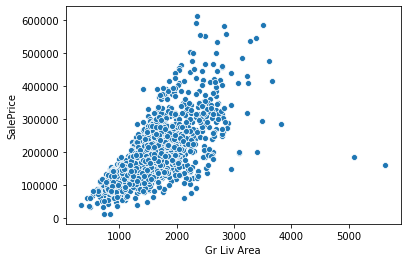

In [64]:
sns.scatterplot(x=train_df['Gr Liv Area'], y=train_df['SalePrice'])

### Kitchen Qual

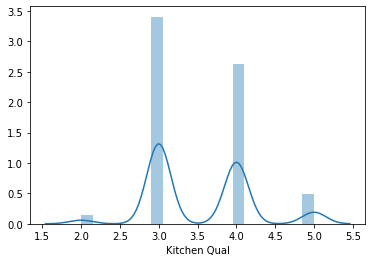

In [65]:
sns.distplot(train_df['Kitchen Qual'])

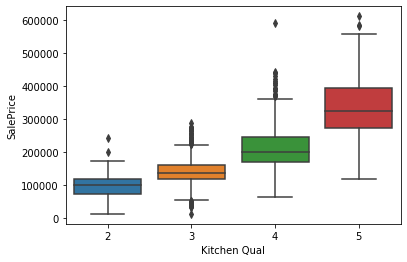

In [66]:
sns.boxplot(x=train_df['Kitchen Qual'], y=train_df['SalePrice'])

### Garage Area & Garage Cars

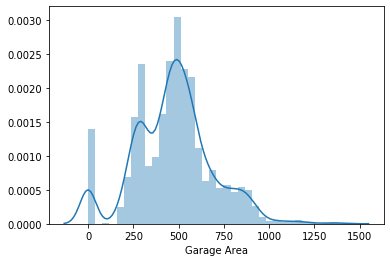

In [67]:
sns.distplot(train_df['Garage Area'])

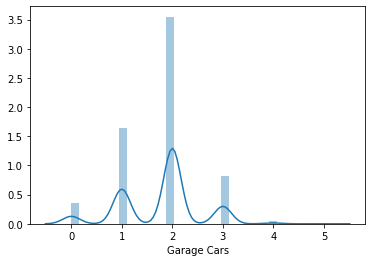

In [68]:
sns.distplot(train_df['Garage Cars'])

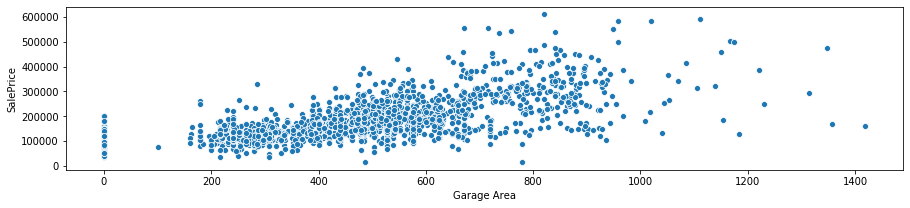

In [69]:
plt.figure(figsize=(15,3))
sns.scatterplot(x=train_df['Garage Area'], y=train_df['SalePrice'])

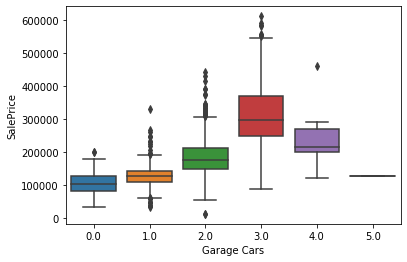

In [70]:
sns.boxplot(x=train_df['Garage Cars'], y=train_df['SalePrice'])

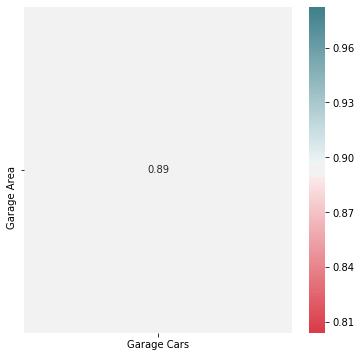

In [71]:
areacar_df = pd.get_dummies(train_df[['Garage Area','Garage Cars']], drop_first=True)
plt.figure(figsize=(6,6))
data_areacar = abs(areacar_df.corr())[['Garage Cars']].sort_values('Garage Cars',ascending = False)
sns.heatmap(data_areacar[1:], annot = True, cmap=sns.diverging_palette(730, 930, n=200) )

From the histogram, we can clearly see that the Garage area corespond to the number of cars can be parked.
This shows that Garage Area & Garage Car are highly correlated and thus we can simply drop either of the column.

In [72]:
train_df.drop('Garage Cars', axis = 1, inplace = True)

### Total Bsmt SF

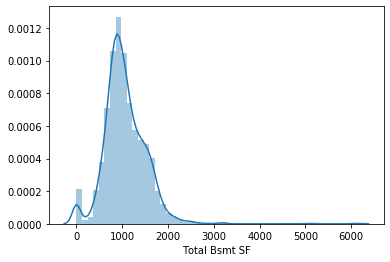

In [73]:
sns.distplot(train_df['Total Bsmt SF'])

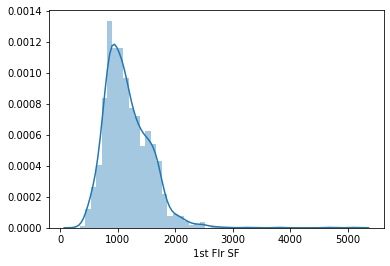

In [74]:
sns.distplot(train_df['1st Flr SF'])

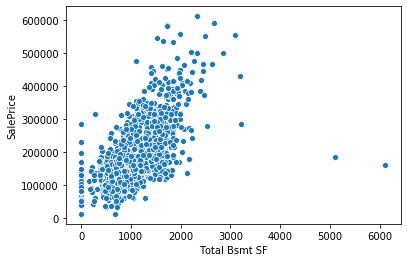

In [75]:
sns.scatterplot(x=train_df['Total Bsmt SF'], y=train_df['SalePrice'])

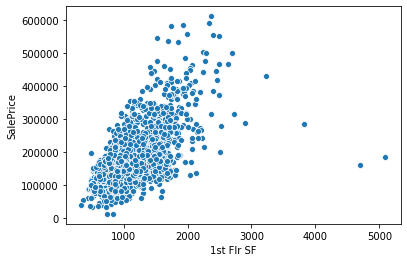

In [76]:
sns.scatterplot(x=train_df['1st Flr SF'], y=train_df['SalePrice'])

From the histogram, we can clearly see that the Basement area corespond to the number of cars can be parked.
This shows that 1st Flr SF & Total Bsmt SF are highly correlated and thus we can drop either of the column.

### Bsmt Qual

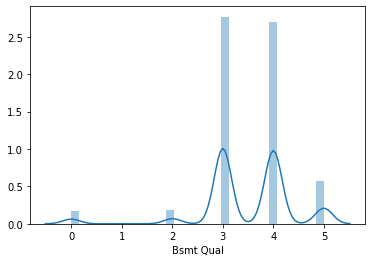

In [77]:
sns.distplot(train_df['Bsmt Qual'])

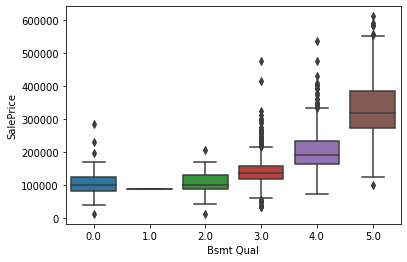

In [78]:
sns.boxplot(x=train_df['Bsmt Qual'], y=train_df['SalePrice'])

We can see that clearly a higher basement height coresponds to Higher Sales Price.

But typical and slightly typical height dominates the market.

### Year Built & Year Sold

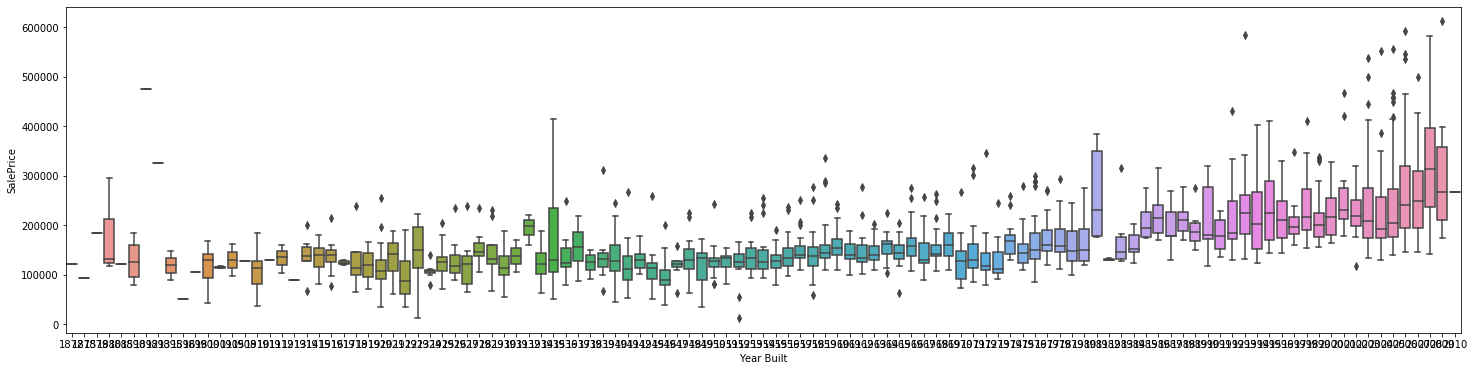

In [79]:
plt.figure(figsize=(25,6))
sns.boxplot(x=train_df['Year Built'], y=train_df['SalePrice'])

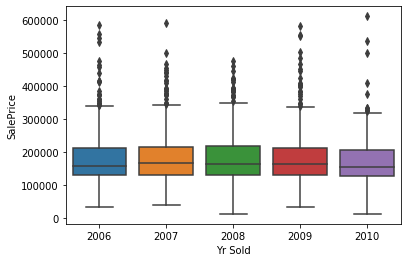

In [80]:
sns.boxplot(x=train_df['Yr Sold'], y=train_df['SalePrice'])

Yr Sold has a very uniform distribution thus it doesnt matter which year it was sold.
There is a big corespond from the year built as the recent the building is build the higher the salesprice, thus a more accurate model would be using the age of the house.

In [81]:
train_df['Age'] = train_df['Yr Sold'] - train_df['Year Built']

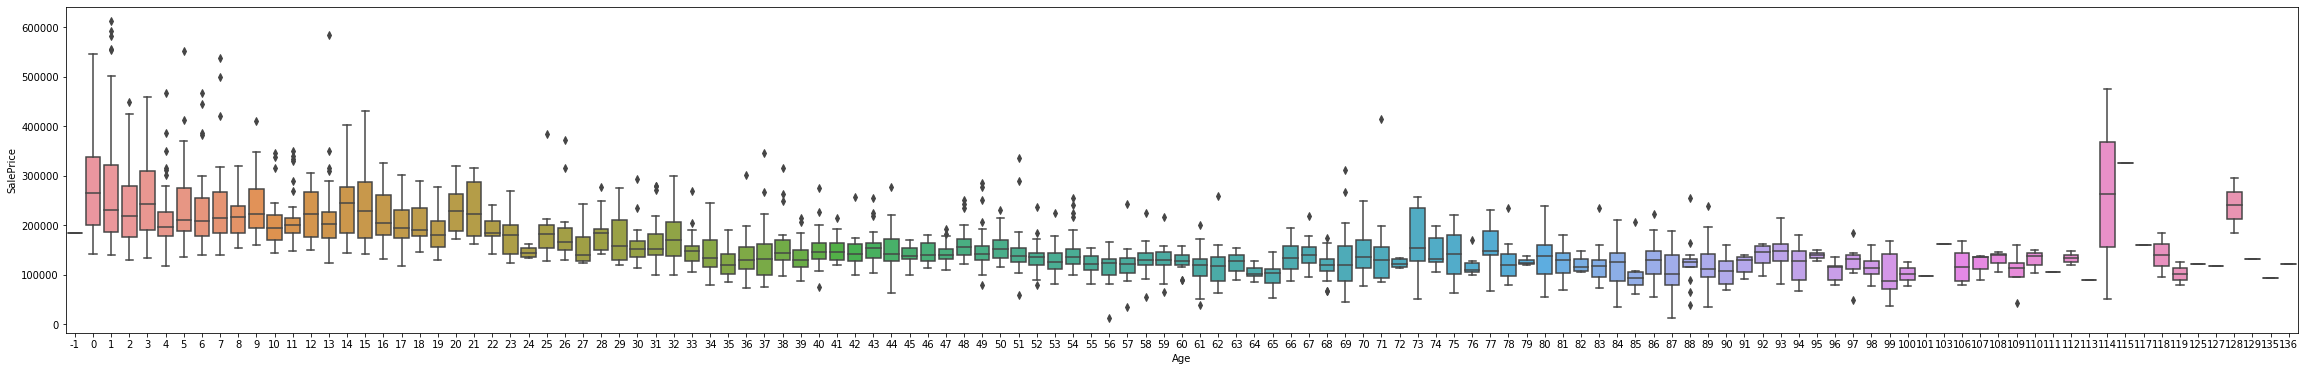

In [82]:
plt.figure(figsize=(40,6))
sns.boxplot(x=train_df['Age'], y=train_df['SalePrice'])

This proves that the age of the house matters, the younger the age the higher the price except for age > 113 as it may be due to legacy houses

### Year Remod/Add

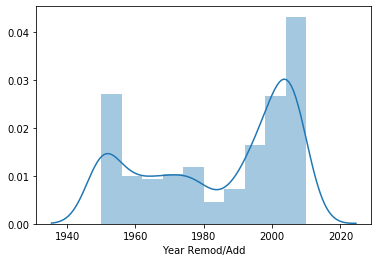

In [83]:
sns.distplot(train_df['Year Remod/Add'])

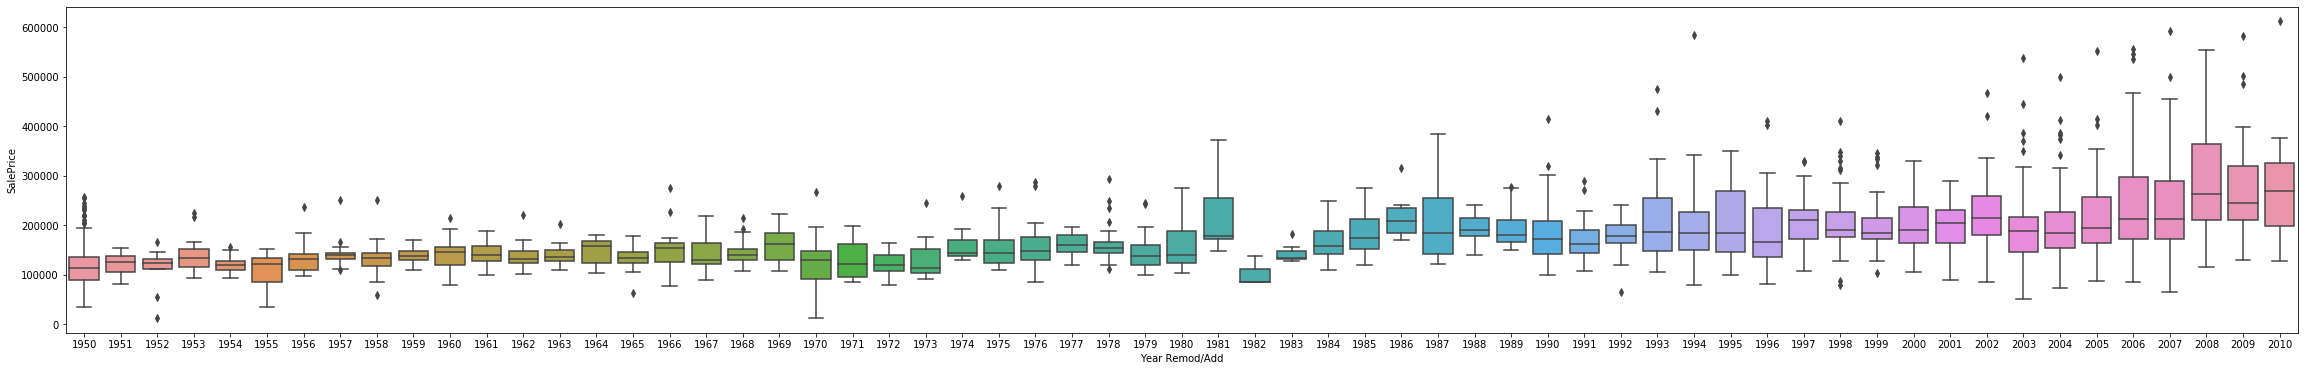

In [84]:
plt.figure(figsize=(40,6))
sns.boxplot(x=train_df['Year Remod/Add'], y=train_df['SalePrice'])

In [85]:
train_df['Mod_Age'] = train_df['Yr Sold'] - train_df['Year Remod/Add']

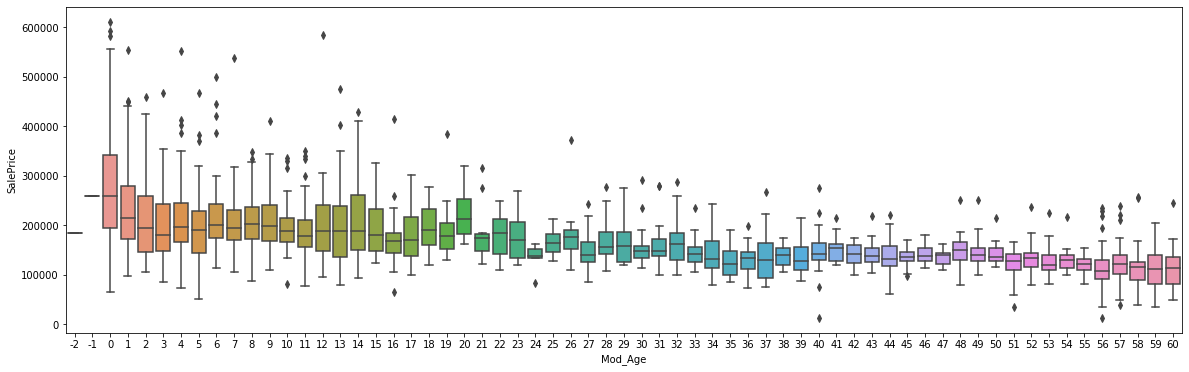

In [86]:
plt.figure(figsize=(20,6))
sns.boxplot(x=train_df['Mod_Age'], y=train_df['SalePrice'])

### Garage Finish

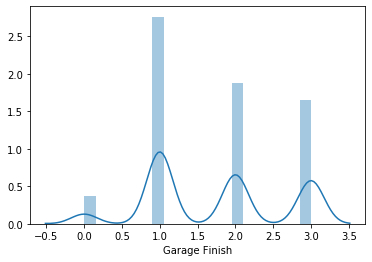

In [87]:
sns.distplot(train_df['Garage Finish'])

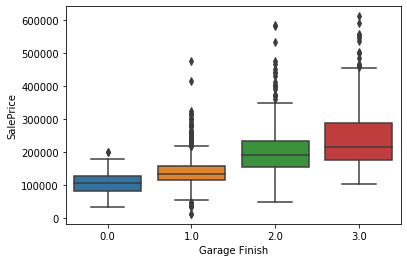

In [88]:
sns.boxplot(x=train_df['Garage Finish'], y=train_df['SalePrice'])

### Fireplace Qu

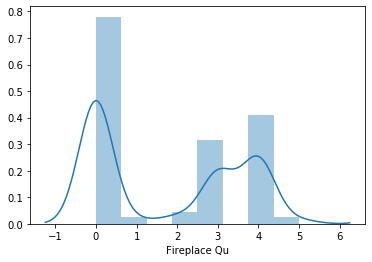

In [89]:
sns.distplot(train_df['Fireplace Qu'])

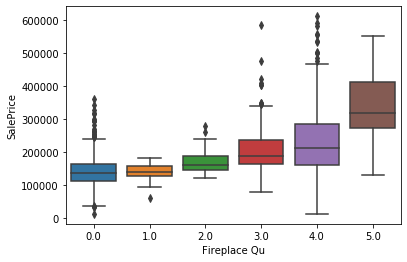

In [90]:
sns.boxplot(x=train_df['Fireplace Qu'], y=train_df['SalePrice'])

### Bsmt Full Bath

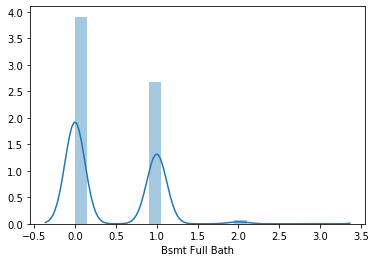

In [91]:
sns.distplot(train_df['Bsmt Full Bath'])

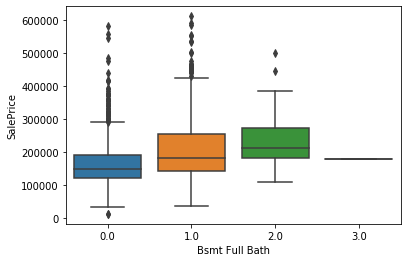

In [92]:
sns.boxplot(x=train_df['Bsmt Full Bath'], y=train_df['SalePrice'])

### TotRms AbvGrd

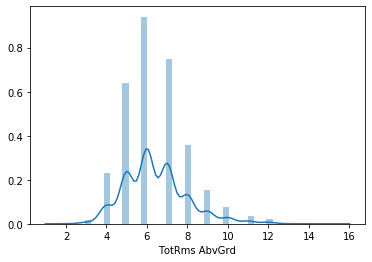

In [93]:
sns.distplot(train_df['TotRms AbvGrd'])

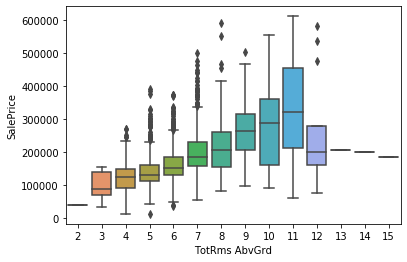

In [94]:
sns.boxplot(x=train_df['TotRms AbvGrd'], y=train_df['SalePrice'])

The distribution looks normal

### Mas Vnr Area

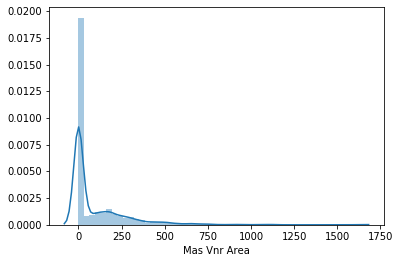

In [95]:
sns.distplot(train_df['Mas Vnr Area'])

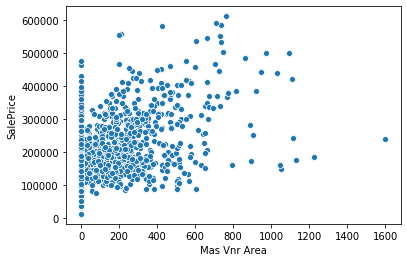

In [96]:
sns.scatterplot(x=train_df['Mas Vnr Area'], y=train_df['SalePrice'])

The distribution is very distorted where it is over whelming from houses with no Masonry

### Fireplaces

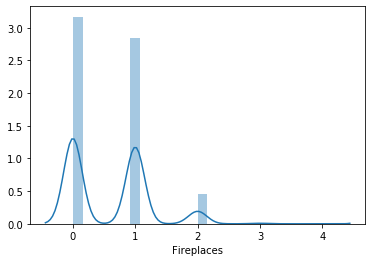

In [97]:
sns.distplot(train_df['Fireplaces'])

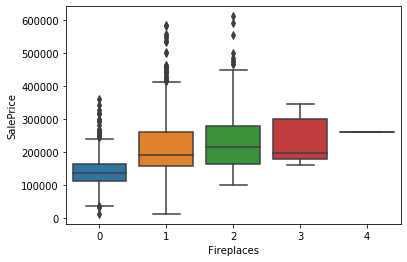

In [98]:
sns.boxplot(x=train_df['Fireplaces'], y=train_df['SalePrice'])

### Heating QC

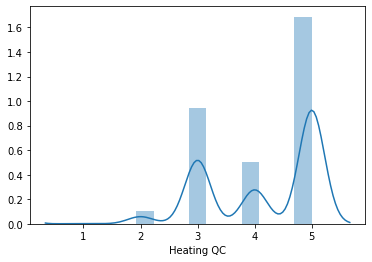

In [99]:
sns.distplot(train_df['Heating QC'])

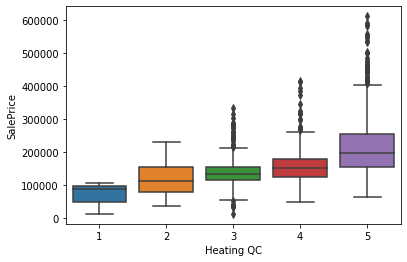

In [100]:
sns.boxplot(x=train_df['Heating QC'], y=train_df['SalePrice'])

### BsmtFin SF 1

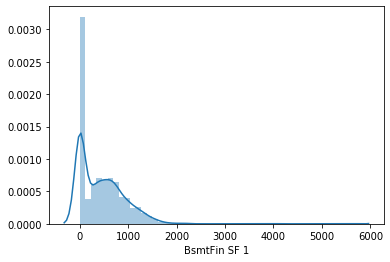

In [101]:
sns.distplot(train_df['BsmtFin SF 1'])

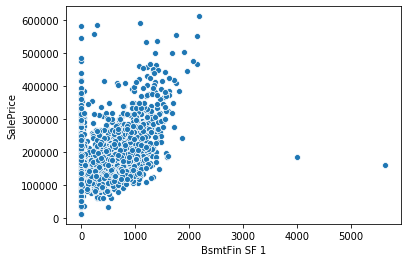

In [102]:
sns.scatterplot(x=train_df['BsmtFin SF 1'], y=train_df['SalePrice'])

### Bsmt Exposure

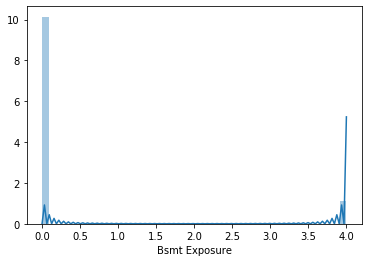

In [103]:
sns.distplot(train_df['Bsmt Exposure'])

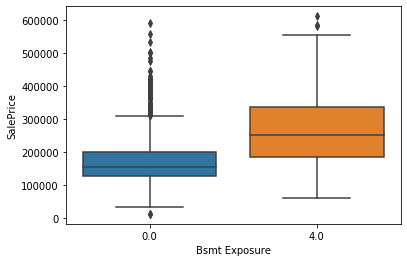

In [104]:
sns.boxplot(x=train_df['Bsmt Exposure'], y=train_df['SalePrice'])

### BsmtFin Type 1

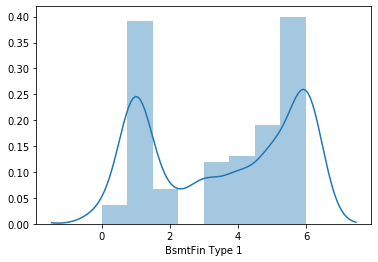

In [105]:
sns.distplot(train_df['BsmtFin Type 1'])

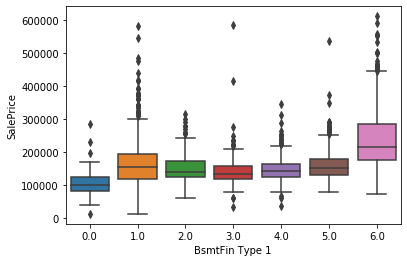

In [106]:
sns.boxplot(x=train_df['BsmtFin Type 1'], y=train_df['SalePrice'])

### Open Porch SF & Wood Deck SF

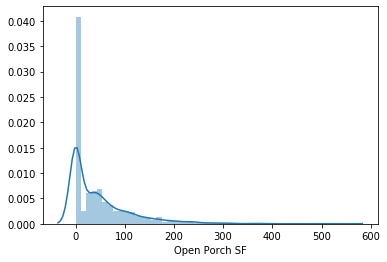

In [107]:
sns.distplot(train_df['Open Porch SF'])

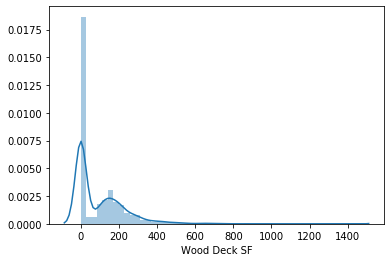

In [108]:
sns.distplot(train_df['Wood Deck SF'])

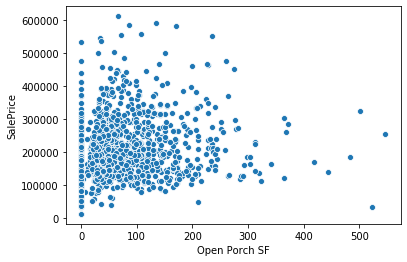

In [109]:
sns.scatterplot(x=train_df['Open Porch SF'], y=train_df['SalePrice'])

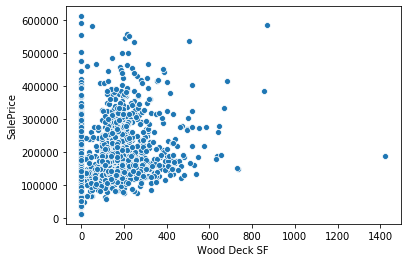

In [110]:
sns.scatterplot(x=train_df['Wood Deck SF'], y=train_df['SalePrice'])

### Lot Area

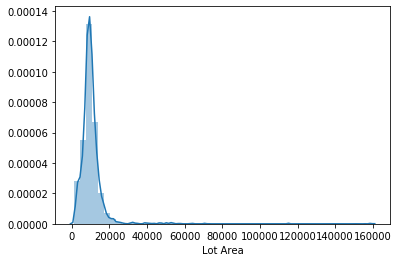

In [111]:
sns.distplot(train_df['Lot Area'])

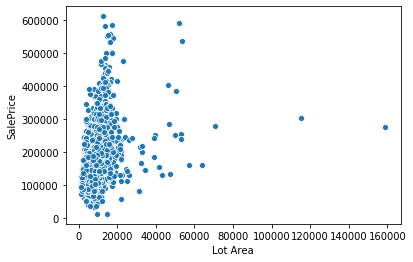

In [112]:
sns.scatterplot(x=train_df['Lot Area'], y=train_df['SalePrice'])

### Neighborhood

In [113]:
train_df['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

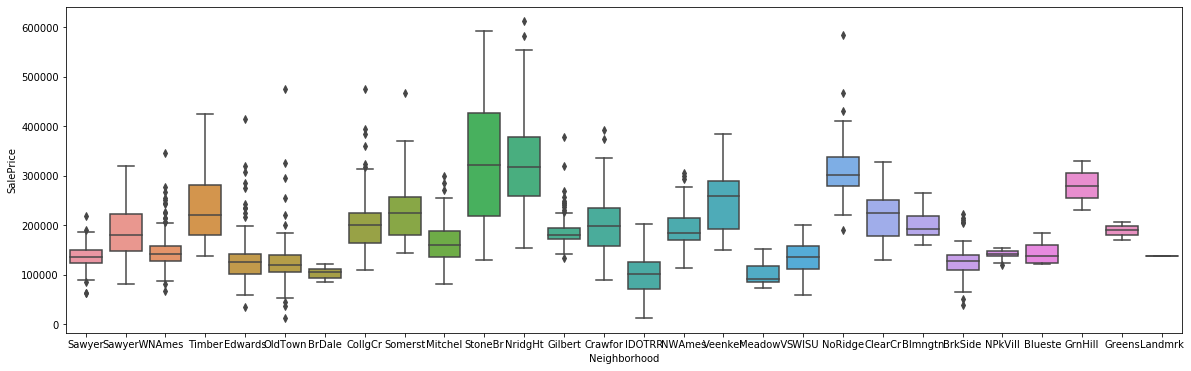

In [114]:
plt.figure(figsize=(20,6))
sns.boxplot(x=train_df['Neighborhood'], y=train_df['SalePrice'])

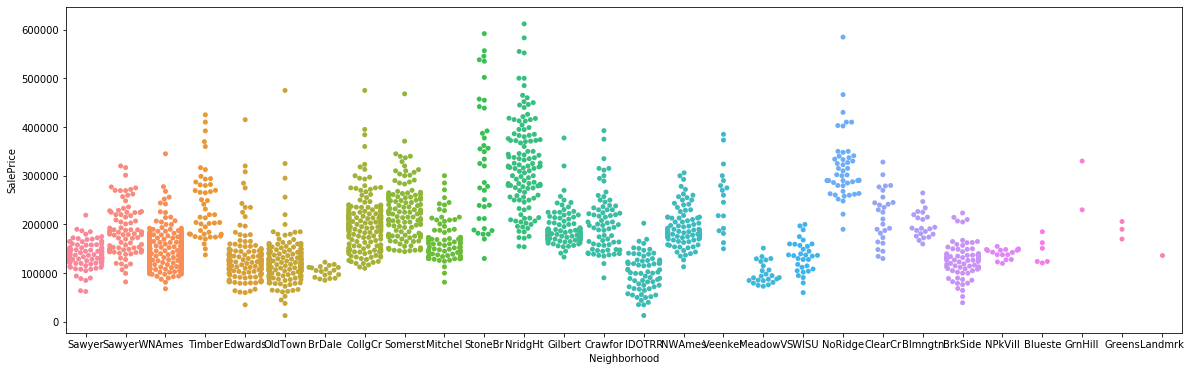

In [115]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=train_df['Neighborhood'], y=train_df['SalePrice']);

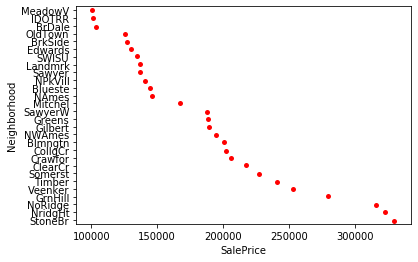

In [116]:
data = pd.concat(
    [
        train_df.groupby('Neighborhood').mean()['SalePrice'],
        train_df.groupby('Neighborhood').count()['Id']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red')

### Condition 1

In [117]:
train_df['Condition 1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

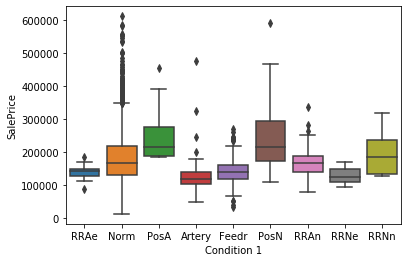

In [118]:
sns.boxplot(train_df['Condition 1'], train_df['SalePrice'])

We can drop 'Condition 1' as it is dominately in 1 category

### Sale Price

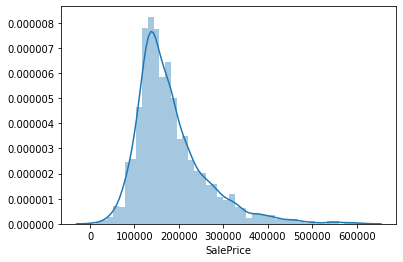

In [119]:
sns.distplot(train_df['SalePrice'][train_df['SalePrice'].notnull()]);

### Ms SubClass

In [120]:
train_df['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64

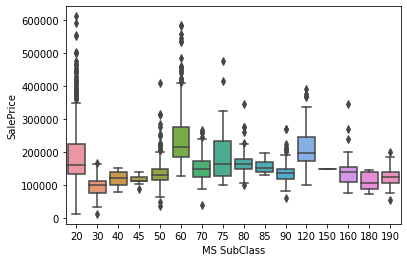

In [121]:
sns.boxplot(train_df['MS SubClass'], train_df['SalePrice'])

### Sale Type

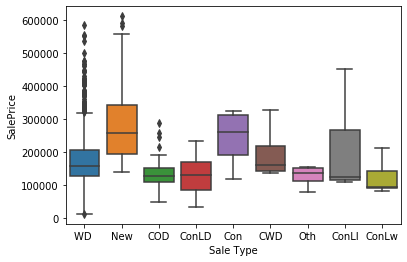

In [122]:
sns.boxplot(train_df['Sale Type'], train_df['SalePrice'])

Drop all variance/ columns that have lower absolute correlation of 0.5, except for Nominal data

### Eliminate the Categories mentioned in EDA

Drop 'PID' since it shares the same unique values like 'Id'
Drop Pool QC as it has mostly similar values.
Drop 'Yr Sold'& 'Year Built' as it has been replaced by 'Age'.

In [123]:
X_train_df = train_df.drop(['PID','Pool QC','Yr Sold','Year Built','Condition 1', 'Year Remod/Add', '1st Flr SF'], axis = 1)

In [124]:
X_train_df.shape

(2051, 75)

In [125]:
X_train_df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,SalePrice,Age,Mod_Age
0,109,60,RL,0.0,13517,Pave,0,3,Lvl,4,CulDSac,3,Sawyer,Norm,1Fam,2Story,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,0.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,Attchd,1976.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0,0,3,WD,130500,34,5
1,544,60,RL,43.0,11492,Pave,0,3,Lvl,4,CulDSac,3,SawyerW,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,0.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0,0,4,WD,220000,13,12
2,153,20,RL,68.0,7922,Pave,0,4,Lvl,4,Inside,3,NAmes,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,0.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,Detchd,1953.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0,0,1,WD,109000,57,3
3,318,60,RL,73.0,9802,Pave,0,4,Lvl,4,Inside,3,Timber,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,0.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,BuiltIn,2007.0,3.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0,0,4,WD,174000,4,3
4,255,50,RL,82.0,14235,Pave,0,3,Lvl,4,Inside,3,SawyerW,Norm,1Fam,1.5Fin,6,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,0.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,Detchd,1957.0,1.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0,0,3,WD,138500,110,17


# 4. Featuring

## 4.1 Get Dummies categorical Data

Get dummies to evaluate the discreet categorical variances

Nominal:
-PID, MS Zoning, Roof Style,Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Street, Alley, Land Contour, Lot Config, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Foundation, Heating, Central Air, Garage Type, Misc Feature,Sale Type, Sale Condition

In [126]:
train_dummy_df = pd.get_dummies(X_train_df[['Id', 
                                          'MS Zoning', 'Roof Style',
                                          'Roof Matl', 'Exterior 1st',
                                          'Exterior 2nd', 'Mas Vnr Type', 
                                          'Street', 'Alley', 'Land Contour',
                                          'Lot Config', 'Neighborhood', 
                                          'Condition 2', 
                                          'Bldg Type', 'House Style', 
                                          'Foundation', 'Heating', 
                                          'Central Air', 'Garage Type', 
                                          'Misc Feature','Sale Type', 
                                         ]], drop_first=True)
train_dummy_df.shape

(2051, 133)

In [127]:
train_dummy_df.head()

,Id,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,...,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,153,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,318,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,255,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### 4.1.1 Drop categories in Get Dummies

In [128]:
#Merge dataset to have Foundation column as variance to predict Y-hat and removing 'Id' column
C_train_df = X_train_df.drop(['MS Zoning', 'Roof Style',
                                    'Roof Matl', 'Exterior 1st',
                                    'Exterior 2nd', 'Mas Vnr Type', 
                                    'Street', 'Alley', 'Land Contour',
                                    'Lot Config', 'Neighborhood', 
                                    'Condition 2', 
                                    'Bldg Type', 'House Style', 
                                    'Foundation', 'Heating', 
                                    'Central Air', 'Garage Type', 
                                    'Misc Feature','Sale Type'], axis = 1)
C_train_df.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Age,Mod_Age
0,109,60,0.0,13517,3,4,3,6,8,289.0,4,3,3.0,3.0,0.0,6.0,533.0,1.0,0.0,192.0,725.0,5,5,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,1976.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0,3,130500,34,5
1,544,60,43.0,11492,3,4,3,7,5,132.0,4,3,4.0,3.0,0.0,6.0,637.0,1.0,0.0,276.0,913.0,5,5,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,1997.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0,4,220000,13,12
2,153,20,68.0,7922,4,4,3,5,7,0.0,3,4,3.0,3.0,0.0,6.0,731.0,1.0,0.0,326.0,1057.0,3,5,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,1953.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0,1,109000,57,3
3,318,60,73.0,9802,4,4,3,5,5,0.0,3,3,4.0,3.0,0.0,1.0,0.0,1.0,0.0,384.0,384.0,4,5,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,2007.0,3.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0,4,174000,4,3
4,255,50,82.0,14235,3,4,3,6,8,0.0,3,3,2.0,4.0,0.0,1.0,0.0,1.0,0.0,676.0,676.0,3,5,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,1957.0,1.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0,3,138500,110,17


In [129]:
C_train_df.shape

(2051, 55)

### 4.1.2 Merge the dataset

In [130]:
Clean_train_df = pd.merge(train_dummy_df, C_train_df, on ='Id')
Clean_train_df.drop(['Id'],axis=1, inplace = True)
Clean_train_df.shape

(2051, 186)

In [131]:
Clean_train_df.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,...,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Age,Mod_Age
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,6.0,533.0,1.0,0.0,192.0,725.0,5,5,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,1976.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0,3,130500,34,5
1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,6.0,637.0,1.0,0.0,276.0,913.0,5,5,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,1997.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0,4,220000,13,12
2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,6.0,731.0,1.0,0.0,326.0,1057.0,3,5,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,1953.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0,1,109000,57,3
3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,0.0,384.0,384.0,4,5,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,2007.0,3.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0,4,174000,4,3
4,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,676.0,676.0,3,5,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,1957.0,1.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0,3,138500,110,17


## 4.2 Check and remove Nan Values

In [132]:
#Checks for Nan/Null Values
Clean_train_df.isnull().sum().sum()

0

No Nan values... Yay!

Saving...

In [133]:
Clean_train_df.to_csv("./datasets/clean_train.csv", index=False, header=True)